<a href="https://colab.research.google.com/github/singhayushi14470-collab/Machine_Learning_1/blob/main/random_forest_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# random forest basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [3]:
x.shape

(500, 2)

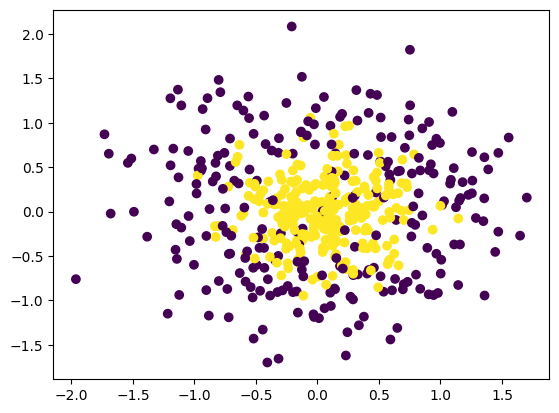

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

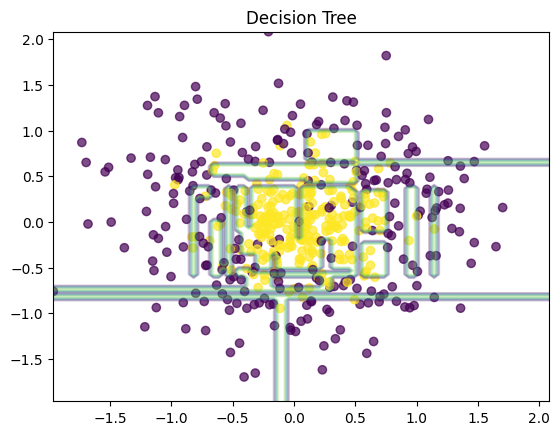

In [11]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)

plt.figure()
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis",alpha=.7)
plt.title("Decision Tree")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

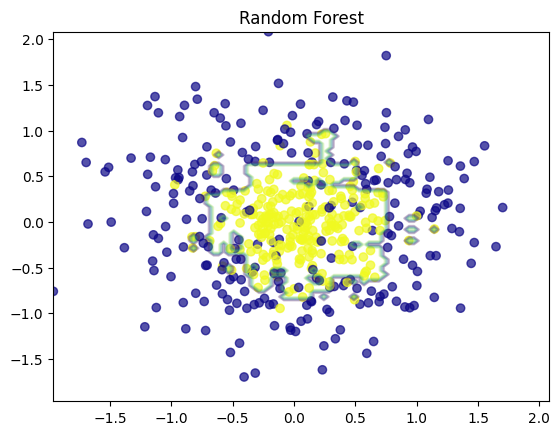

In [18]:
rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)

plt.figure()
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma',alpha=.7)
plt.title("Random Forest")
plt.show()


In [20]:
n_train=150
n_test=1000
noise=0.1

# Generate data
def f(x):
  x=x.ravel()
  return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generate(n_samples,noise):
  x=np.random.rand(n_samples)*10-5
  x=np.sort(x).ravel()
  y=np.exp(-x**2)+1.5*np.exp(-(x-2)**2)\
                             +np.random.normal(.0,noise,n_samples)
  x=x.reshape((n_samples,1))

  return x,y

x_train,y_train=generate(n_samples=n_train,noise=noise)
x_test,y_test=generate(n_samples=n_test,noise=noise)


(-5.0, 5.0)

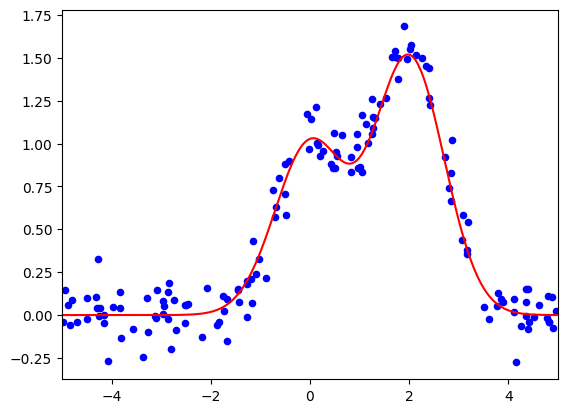

In [22]:
plt.figure()
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.xlim([-5,5])

Text(0.5, 1.0, 'Decision Tree,mse=23.78')

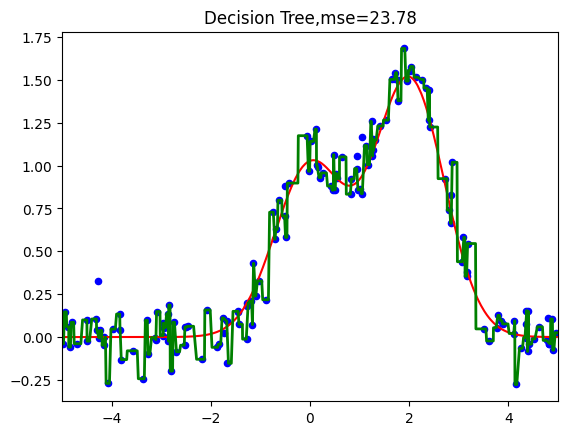

In [25]:
# one decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor().fit(x_train,y_train)
d_predict=dtree.predict(x_test)

plt.figure()
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.plot(x_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decision Tree,mse=%.2f"
          %np.sum((y_test - d_predict)**2))

Text(0.5, 1.0, 'Random Forest,mse=23.78')

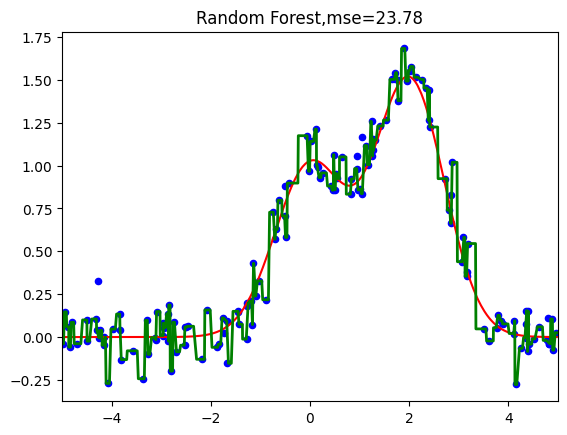

In [26]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000).fit(x_train,y_train)
rf_predict=rfr.predict(x_test)
plt.figure()
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.plot(x_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Random Forest,mse=%.2f"
          %np.sum((y_test - d_predict)**2))